# Imports 

In [2]:
import tensorflow.keras.applications.resnet50 as resnet50
from tensorflow.keras.models import load_model
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping

import os
import numpy as np
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

2023-03-22 18:04:49.834111: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
resnet = load_model("../models/Resnet_50_epoch.h5", compile=False)

2023-03-22 18:05:00.672448: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
opt = optimizers.Adam(learning_rate=1e-4)

def compile_model(model):
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [5]:
resnet = compile_model(resnet)

In [6]:
resnet

In [7]:
breed = ['Chihuahua', 'Japanese_spaniel', 'Maltese_dog', 'Pekinese', 'Shih', 'Blenheim_spaniel', 'papillon', 'toy_terrier', 'Rhodesian_ridgeback', 'Afghan_hound', 'basset', 'beagle', 'bloodhound', 'bluetick', 'black', 'Walker_hound', 'English_foxhound', 'redbone', 'borzoi', 'Irish_wolfhound', 'Italian_greyhound', 'whippet', 'Ibizan_hound', 'Norwegian_elkhound', 'otterhound', 'Saluki', 'Scottish_deerhound', 'Weimaraner', 'Staffordshire_bullterrier', 'American_Staffordshire_terrier', 'Bedlington_terrier', 'Border_terrier', 'Kerry_blue_terrier', 'Irish_terrier', 'Norfolk_terrier', 'Norwich_terrier', 'Yorkshire_terrier', 'wire', 'Lakeland_terrier', 'Sealyham_terrier', 'Airedale', 'cairn', 'Australian_terrier', 'Dandie_Dinmont', 'Boston_bull', 'miniature_schnauzer', 'giant_schnauzer', 'standard_schnauzer', 'Scotch_terrier', 'Tibetan_terrier', 'silky_terrier', 'soft', 'West_Highland_white_terrier', 'Lhasa', 'flat', 'curly', 'golden_retriever', 'Labrador_retriever', 'Chesapeake_Bay_retriever', 'German_short', 'vizsla', 'English_setter', 'Irish_setter', 'Gordon_setter', 'Brittany_spaniel', 'clumber', 'English_springer', 'Welsh_springer_spaniel', 'cocker_spaniel', 'Sussex_spaniel', 'Irish_water_spaniel', 'kuvasz', 'schipperke', 'groenendael', 'malinois', 'briard', 'kelpie', 'komondor', 'Old_English_sheepdog', 'Shetland_sheepdog', 'collie', 'Border_collie', 'Bouvier_des_Flandres', 'Rottweiler', 'German_shepherd', 'Doberman', 'miniature_pinscher', 'Greater_Swiss_Mountain_dog', 'Bernese_mountain_dog', 'Appenzeller', 'EntleBucher', 'boxer', 'bull_mastiff', 'Tibetan_mastiff', 'French_bulldog', 'Great_Dane', 'Saint_Bernard', 'Eskimo_dog', 'malamute', 'Siberian_husky', 'affenpinscher', 'basenji', 'pug', 'Leonberg', 'Newfoundland', 'Great_Pyrenees', 'Samoyed', 'Pomeranian', 'chow', 'keeshond', 'Brabancon_griffon', 'Pembroke', 'Cardigan', 'toy_poodle', 'miniature_poodle', 'standard_poodle', 'Mexican_hairless', 'dingo', 'dhole', 'African_hunting_dog']

In [9]:
import os
import numpy as np
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img



# Grabs an image based on its URL, and resize it
def getImage(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    plt.imshow(img)
    img = img.resize((224, 224))
    return img

# Takes an image and a model
def predictImage(url, model):
    # Get the image
    img = getImage(url)
    img = img_to_array(img)    #shape = (224, 224, 3)
    # Reshape the image
    img = img.reshape((-1, 224, 224, 3))   #shape=(1, 224, 224, 3)
    # Preprocess the image
    img = model.preprocess_input(img)
    # Make predictions
    res = model.predict(img)
    
    # Get the top 3 predictions
    indexes = np.argsort(res)[0][-3:][::-1]  
    first = indexes[0]
    second = indexes[1]
    third = indexes[2]
    
    
    predicts = np.sort(res)[0][::-1][0:3]
    predict_first = round(predicts[0],2)
    predict_second = round(predicts[1],2)
    predict_third = round(predicts[2],2)
    
    #class_names = train_ds.class_names
    #class_names = [re.findall('n\d{8}-(.*)', i)[0].capitalize() for i in class_names]
    class_names = breed
    
    print(f"Top three breeds: {class_names[first]}, {class_names[second]}, {class_names[third]}")
    print(f"Top three probabilities = {predict_first*100} %, {predict_second*100} %, {predict_third*100} %")

In [11]:
dog1 = "https://www.purina.co.uk/sites/default/files/2022-07/French-Bulldog.jpg"
dog2 = "https://www.aspcapetinsurance.com/media/2325/facts-about-maltese-dogs.jpg"
dog3 = "https://www.akc.org/wp-content/uploads/2017/11/Chihuahua-standing-in-three-quarter-view.jpg"
dog4 = "https://images.sudouest.fr/2018/04/14/5ace461a66a4bd2b1780a0dd/widescreen/1000x500/on-ignore-si-le-chihuahua-a-deserte-ou-non-les-locaux-de-la-clinique.jpg?v1"
dog5 = "https://ds1.static.rtbf.be/article/image/370x208/7/8/f/a20f02dfccd07952da54a7f9a82b3e89-1524657315.jpg"

AttributeError: 'Sequential' object has no attribute 'preprocess_input'

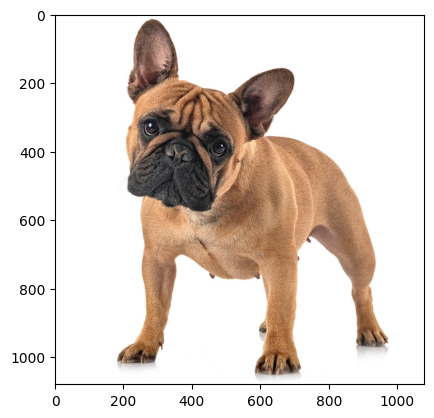

In [12]:
predictImage(dog1, resnet)

1/1 [==============================] - 0s 195ms/step
Top three breeds: Maltese_dog, Lhasa, Dandie_Dinmont
Top three probabilities = 95.99999785423279 %, 2.9999999329447746 %, 0.0 %


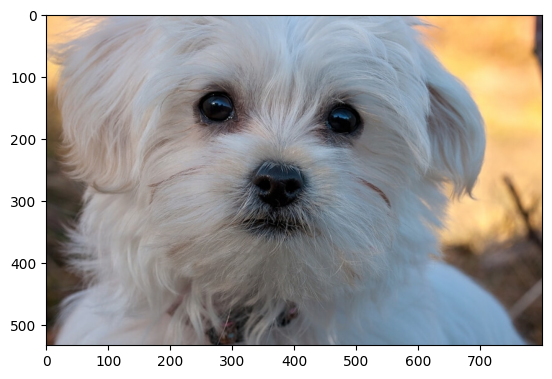

In [19]:
predictImage(dog2, resnet)

1/1 [==============================] - 0s 173ms/step
Top three breeds: Cardigan, Chihuahua, Pembroke
Top three probabilities = 43.00000071525574 %, 27.000001072883606 %, 10.000000149011612 %


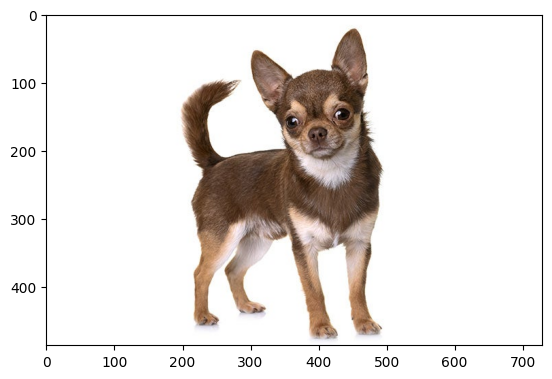

In [20]:
predictImage(dog3, resnet)

1/1 [==============================] - 0s 174ms/step
Top three breeds: French_bulldog, borzoi, Chihuahua
Top three probabilities = 54.00000214576721 %, 15.999999642372131 %, 7.999999821186066 %


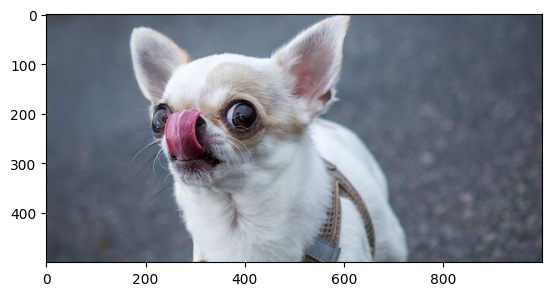

In [21]:
predictImage(dog4, resnet)

1/1 [==============================] - 0s 167ms/step
Top three breeds: Pembroke, dingo, basenji
Top three probabilities = 38.999998569488525 %, 34.00000035762787 %, 9.000000357627869 %


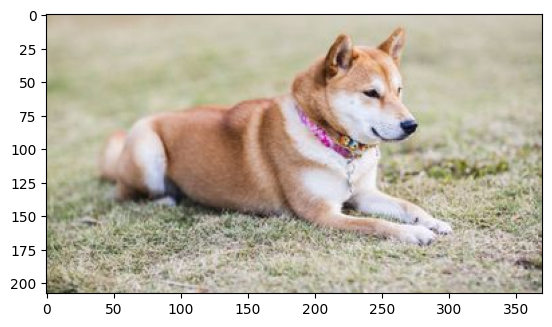

In [22]:
predictImage(dog5, resnet)

In [31]:
# New dogs
dog6 = "http://animalsbreeds.com/wp-content/uploads/2015/03/Labrador-Retriever-6.jpg"
dog7 = "http://www.reportingday.com/wp-content/uploads/2018/07/Labrador-Retriever-Dog-HD-Wallpapers.jpg"
dog8 = "http://www.petpaw.com.au/wp-content/uploads/2014/07/Weimaraner-3.jpg"
dog9 = "https://pettime.net/wp-content/uploads/2021/04/Weimaraners-6.jpg"
dog10 = "https://images3.alphacoders.com/103/1036965.jpg"
dog11 = "http://www.completedogsguide.com/images/dog-breeds/largepic/Pomeranian2.jpg"
dog12 = "https://4.bp.blogspot.com/-qg5X-jII0vs/TkD1mZMc1sI/AAAAAAAAHzY/VIeCx5Kpbbo/s1600/pomeranian-wallpapers.jpg"
dog13 = "https://animalia-life.com/data_images/norfolk-terrier/norfolk-terrier7.jpg"
dog14 = "http://animalsbreeds.com/wp-content/uploads/2014/10/Norfolk-Terrier-10.jpg"

1/1 [==============================] - 0s 274ms/step
Top three breeds: golden_retriever, Labrador_retriever, Leonberg
Top three probabilities = 34.00000035762787 %, 33.000001311302185 %, 9.000000357627869 %


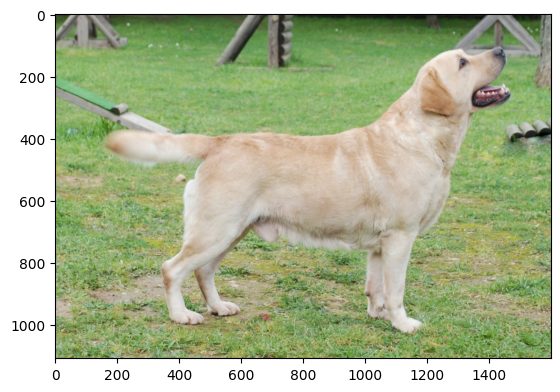

In [28]:
predictImage(dog6, resnet)

1/1 [==============================] - 0s 155ms/step
Top three breeds: Weimaraner, Great_Dane, Labrador_retriever
Top three probabilities = 100.0 %, 0.0 %, 0.0 %


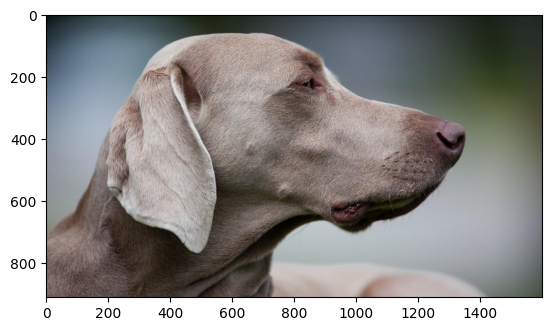

In [41]:
predictImage(dog9, resnet)

1/1 [==============================] - 0s 157ms/step
Top three breeds: Weimaraner, Great_Dane, Saluki
Top three probabilities = 100.0 %, 0.0 %, 0.0 %


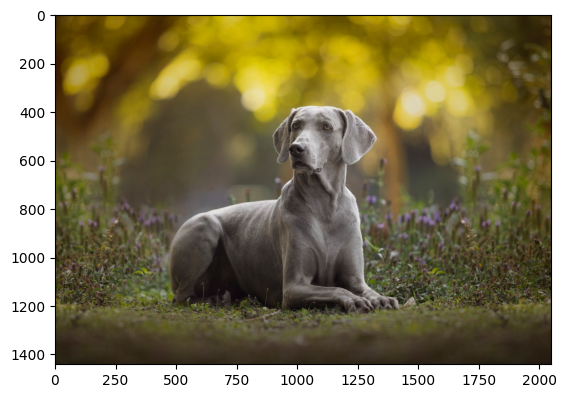

In [40]:
predictImage(dog10, resnet)

1/1 [==============================] - 0s 179ms/step
Top three breeds: Pomeranian, toy_poodle, Maltese_dog
Top three probabilities = 100.0 %, 0.0 %, 0.0 %


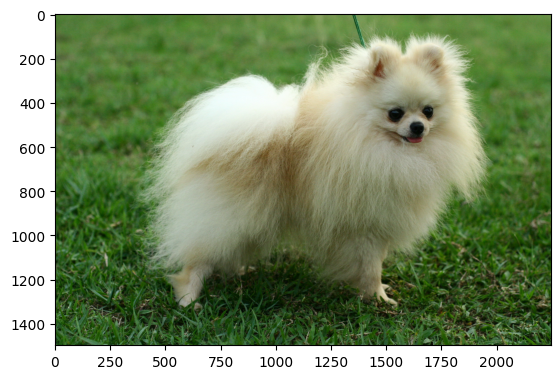

In [35]:
predictImage(dog11, resnet)


1/1 [==============================] - 0s 151ms/step
Top three breeds: Pomeranian, Samoyed, collie
Top three probabilities = 86.00000143051147 %, 5.999999865889549 %, 2.9999999329447746 %


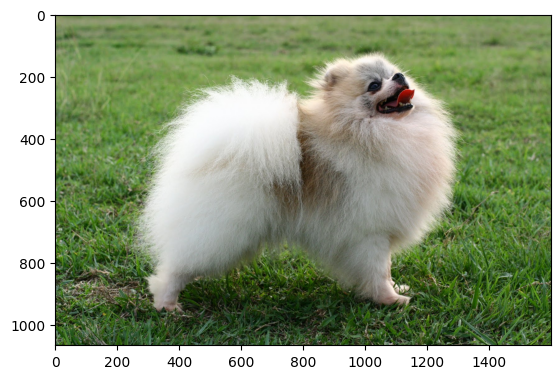

In [36]:
predictImage(dog12, resnet)


In [37]:
predictImage(dog13, resnet)

SSLError: HTTPSConnectionPool(host='animalia-life.com', port=443): Max retries exceeded with url: /data_images/norfolk-terrier/norfolk-terrier7.jpg (Caused by SSLError(SSLError(1, '[SSL: WRONG_SIGNATURE_TYPE] wrong signature type (_ssl.c:997)')))

1/1 [==============================] - 0s 153ms/step
Top three breeds: Norfolk_terrier, Norwich_terrier, Australian_terrier
Top three probabilities = 56.00000023841858 %, 38.999998569488525 %, 3.999999910593033 %


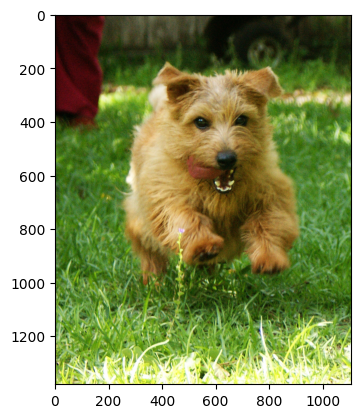

In [38]:
predictImage(dog14, resnet)

In [39]:
'Weimaraner' in breed

True